In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import missingno as msno
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
path = 'MyDrive/Colab Notebooks/datas/aiffel/kaggle-kakr-housing-data/'
data_path = join('/content/drive/', path)

train = pd.read_csv(join(data_path, 'train.csv'))
test = pd.read_csv(join(data_path, 'test.csv'))

<Axes: >

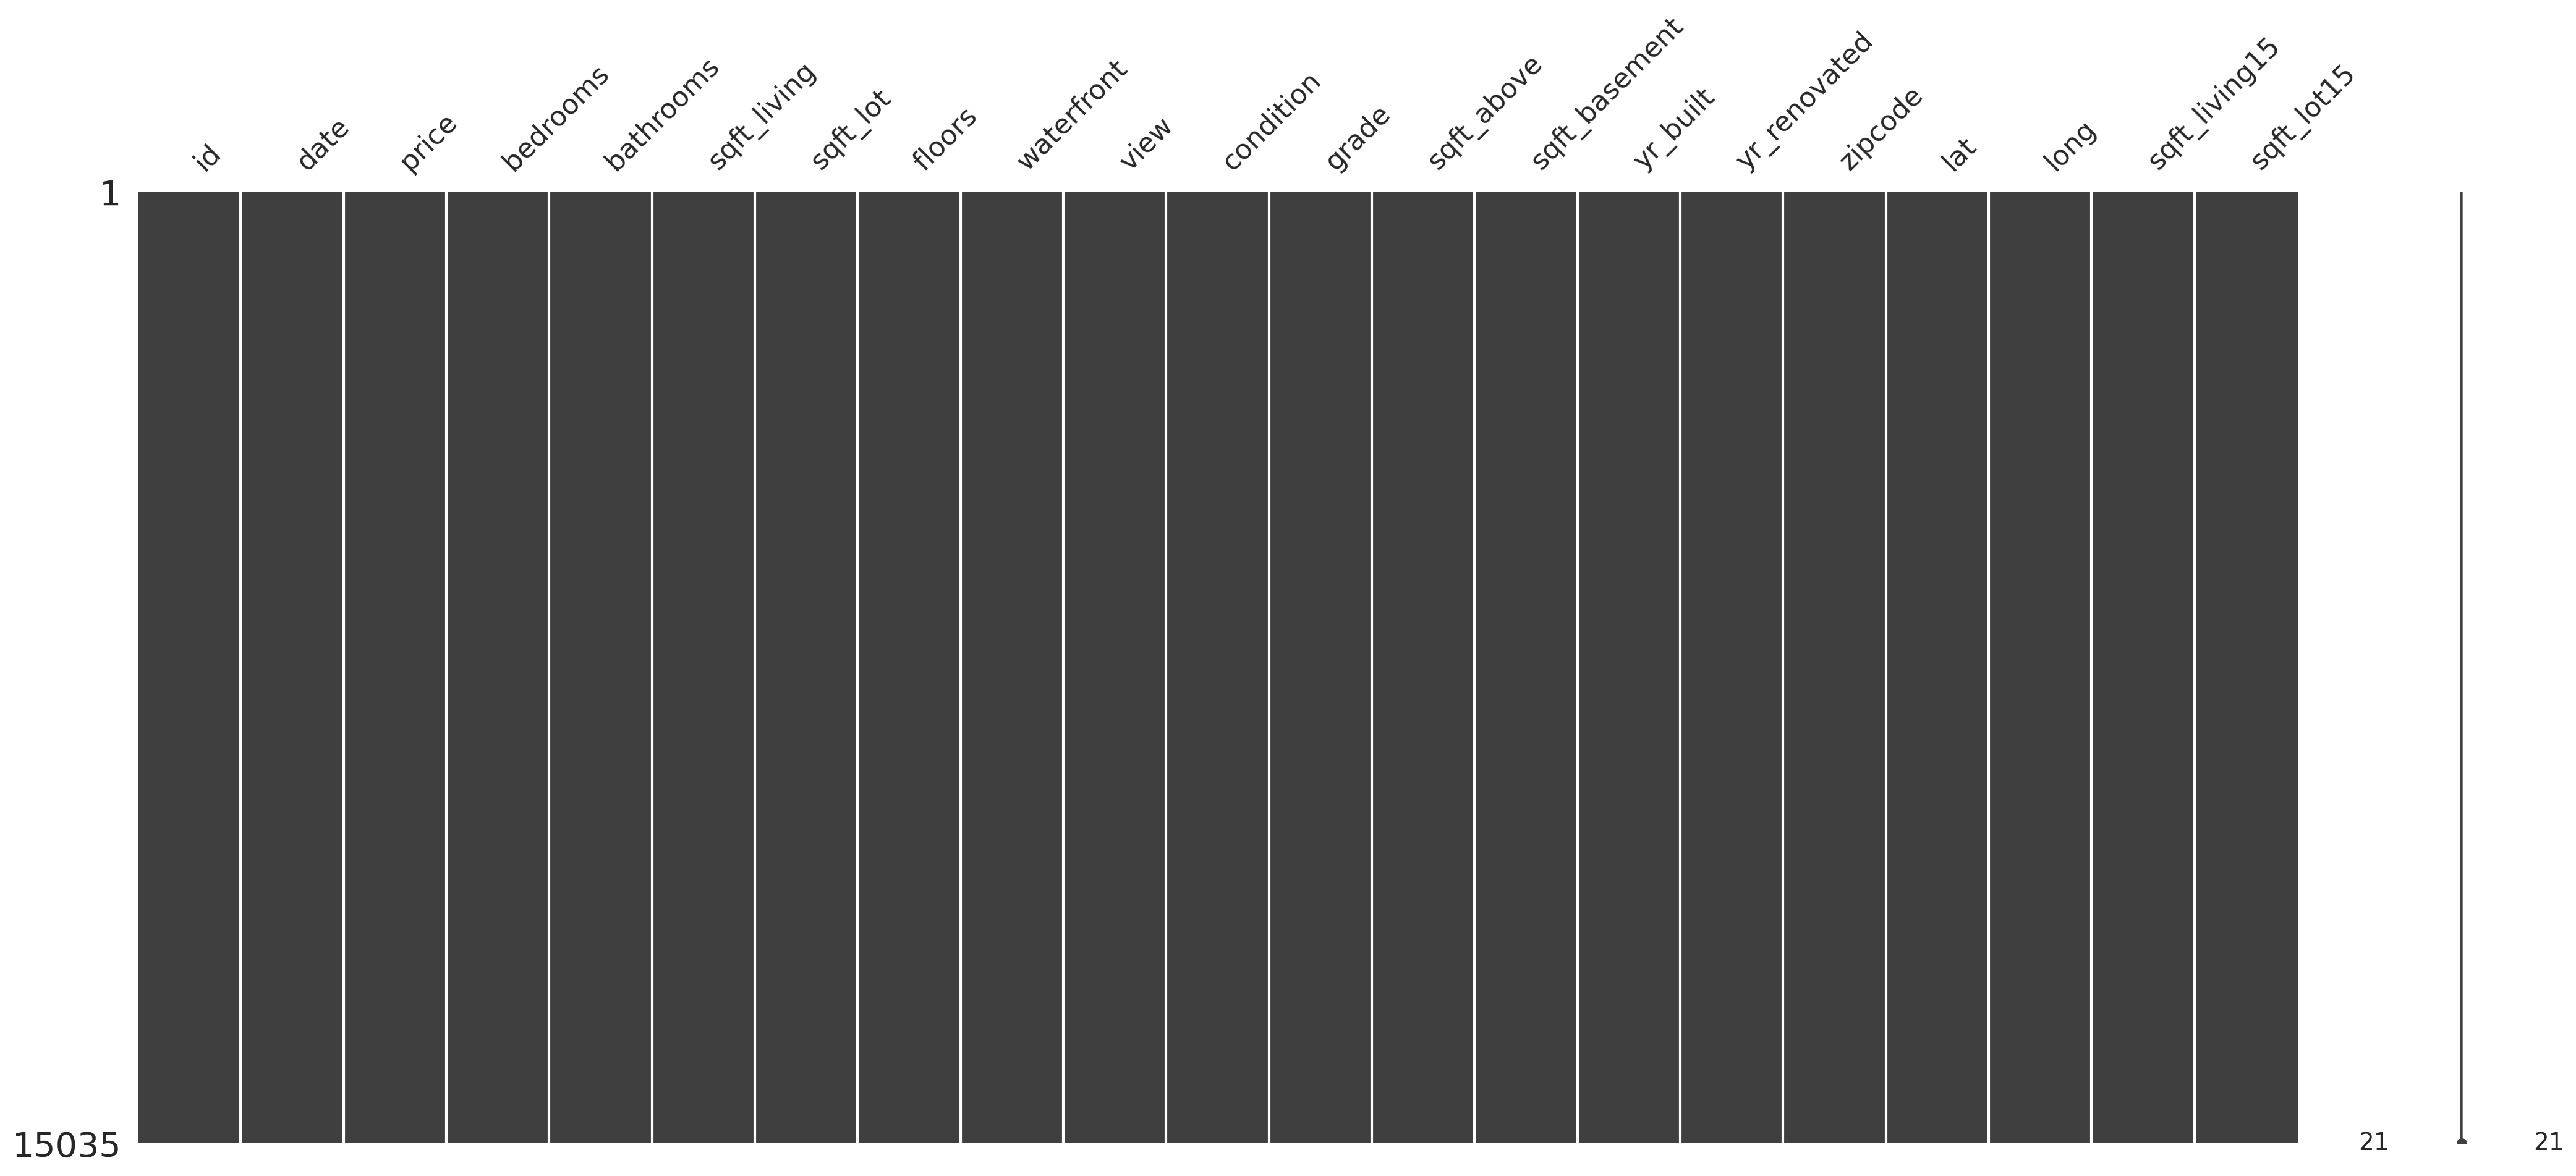

In [ ]:
msno.matrix(train)

<Axes: >

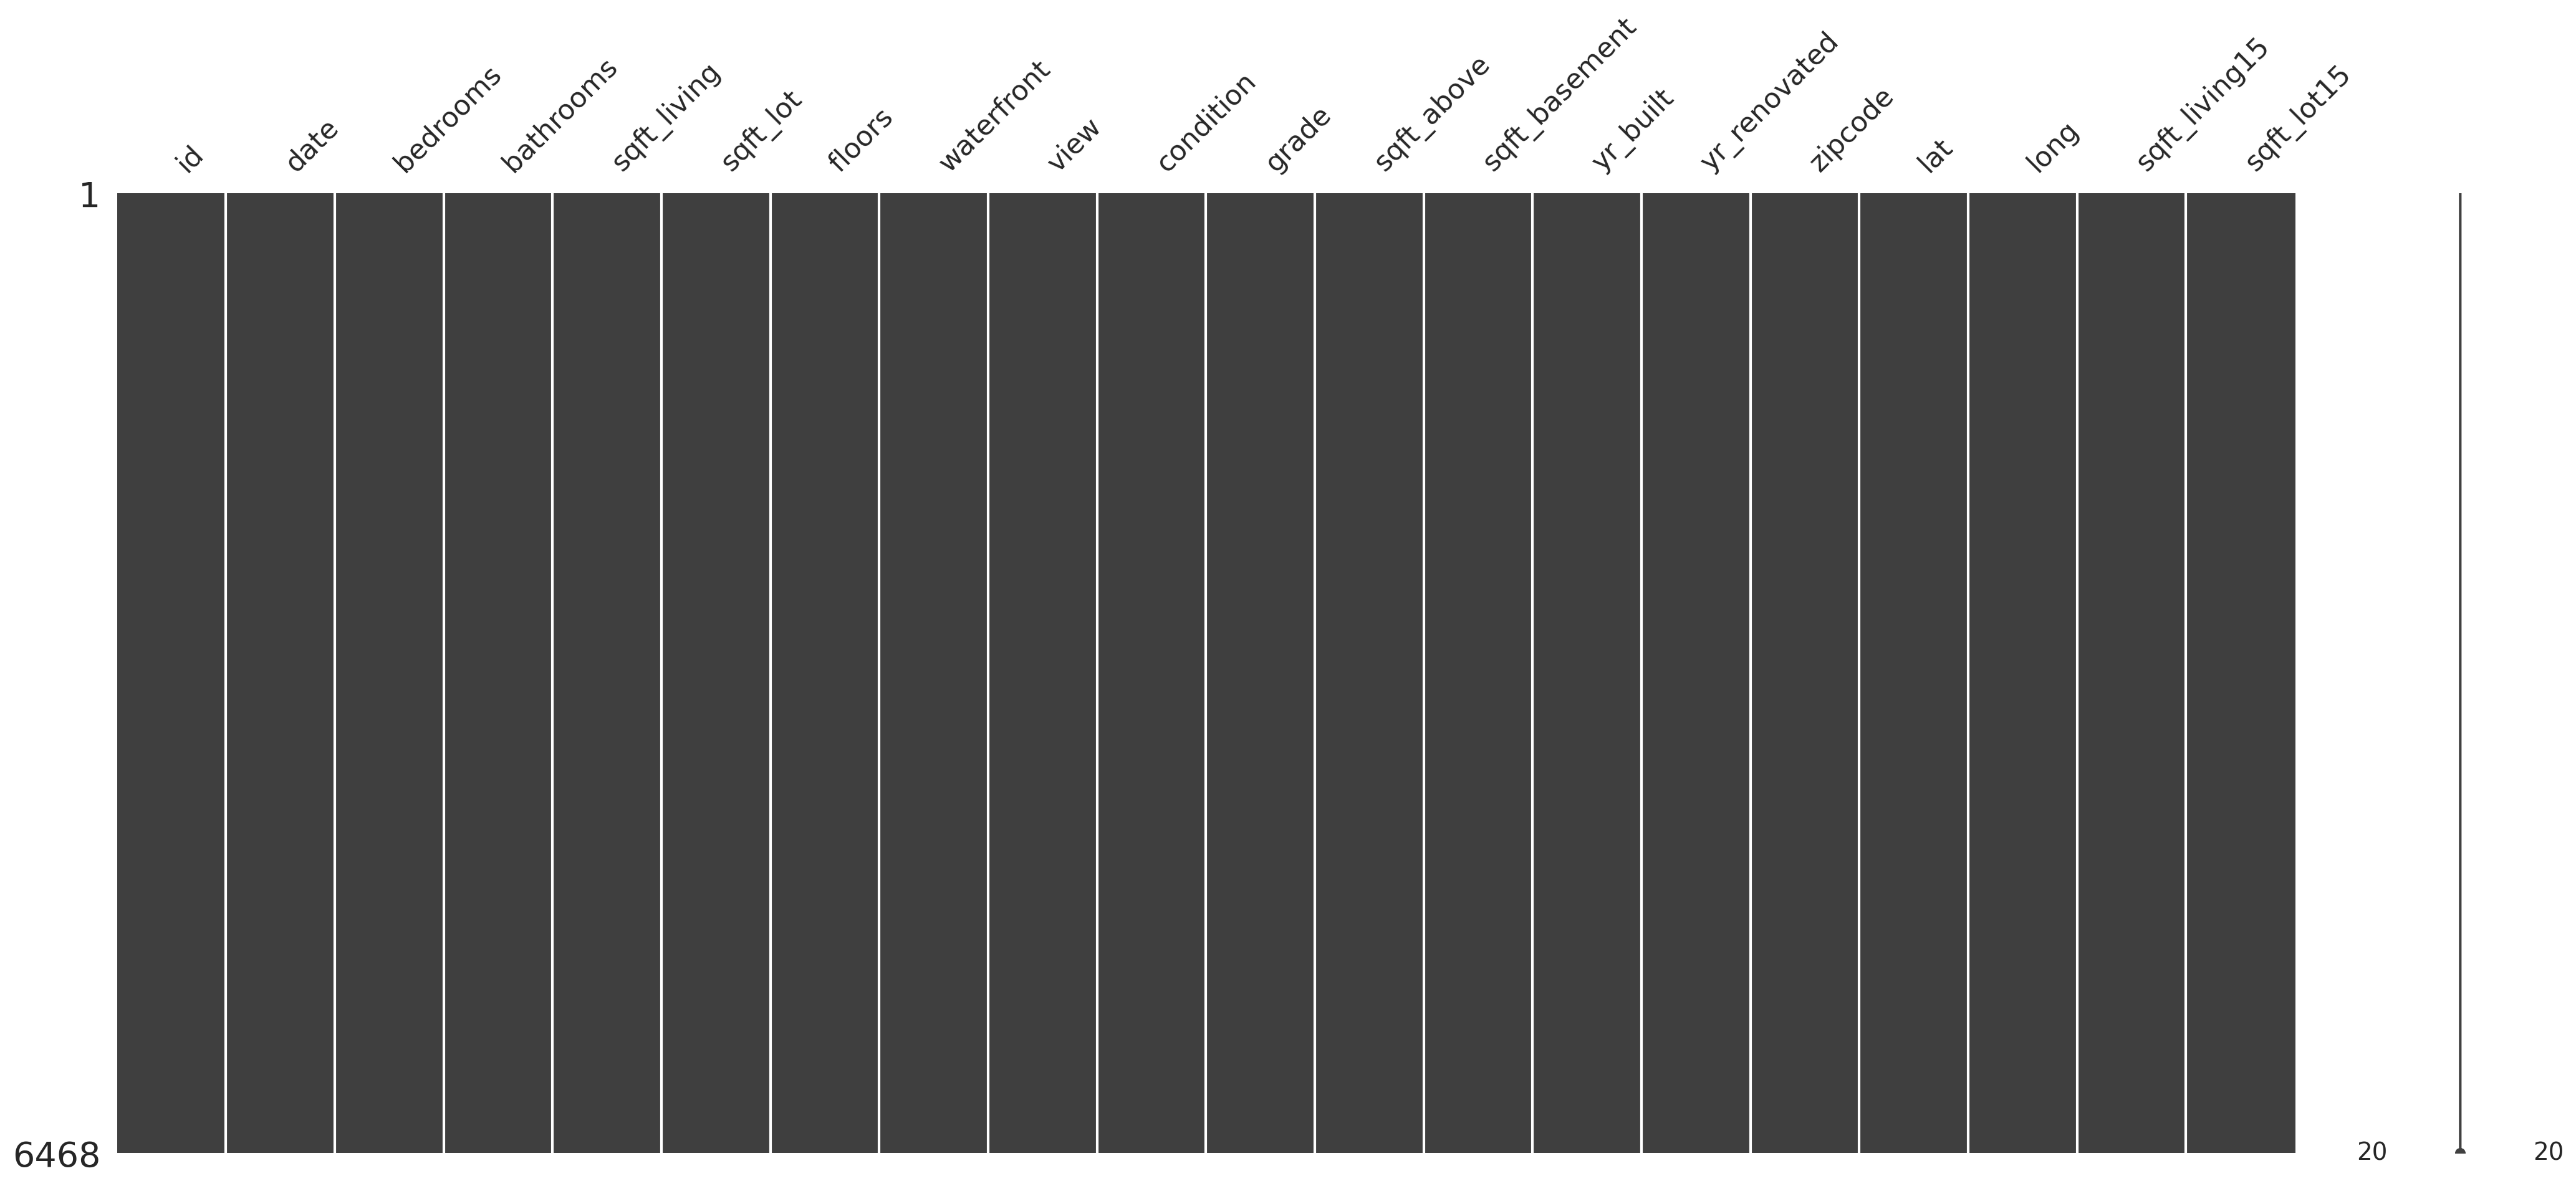

In [ ]:
msno.matrix(test)

In [ ]:
train.shape, test.shape

((15035, 21), (6468, 20))

In [ ]:
train.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
test.isna().sum()

,0
id,0
date,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
# train = train[np.abs(train['price']-train['price'].mean())<=(3.4*train['price'].std())]

<Axes: ylabel='price'>

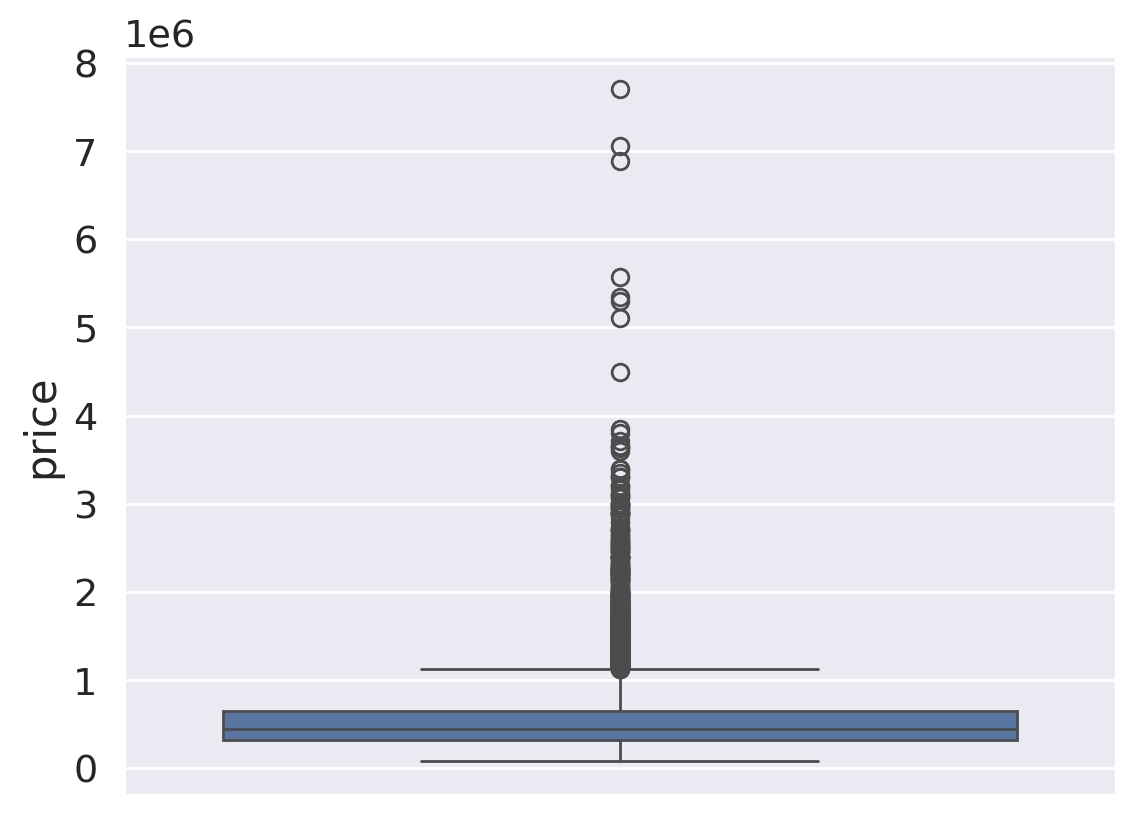

In [ ]:
sns.boxplot(train['price'])

In [ ]:
train.shape

(15035, 21)

In [ ]:
train['date']=train['date'].apply(lambda x: x[:6]).astype(int)
test['date']=test['date'].apply(lambda x: x[:6]).astype(int)

In [ ]:
y=train['price']

<Axes: xlabel='price', ylabel='Density'>

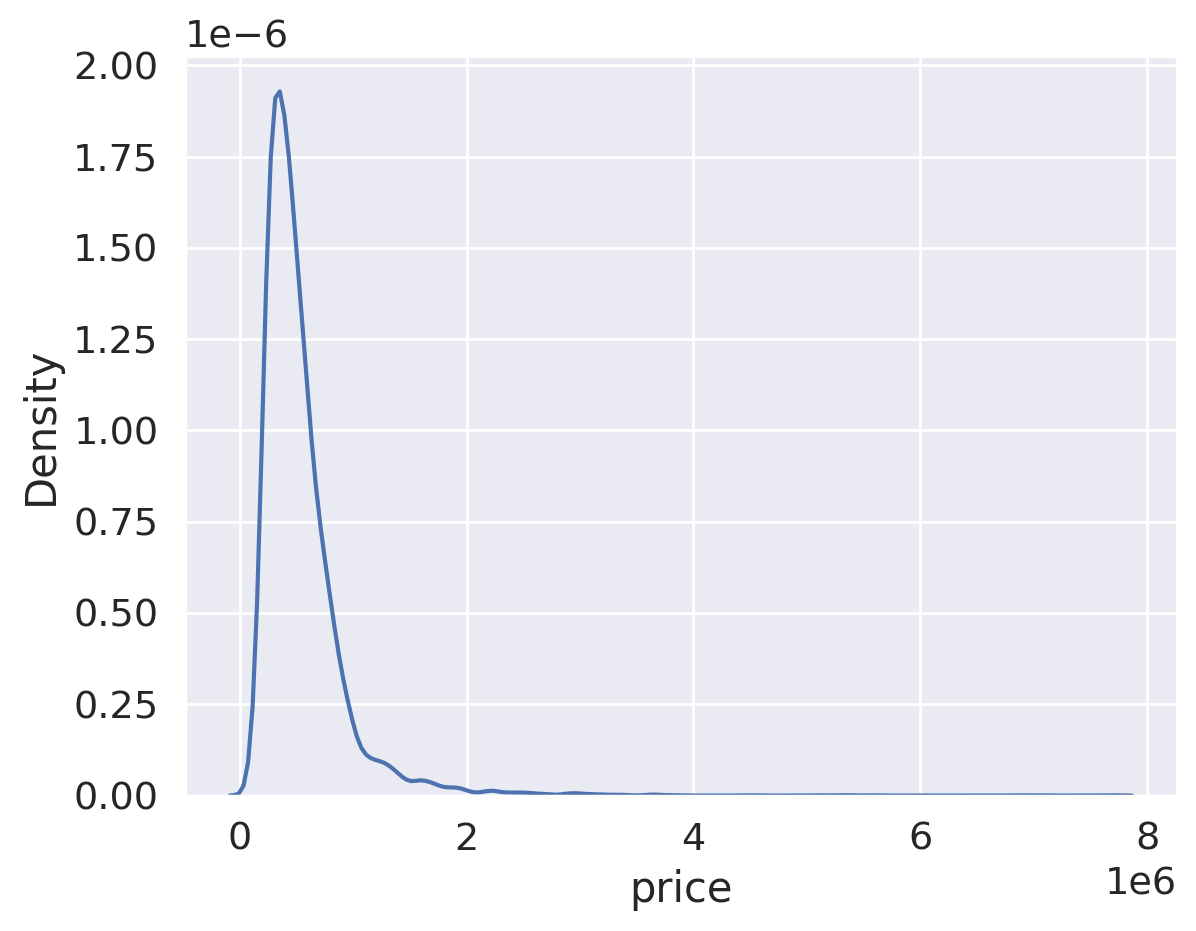

In [ ]:
sns.kdeplot(y)

In [ ]:
y=np.log1p(y)

<Axes: xlabel='price', ylabel='Density'>

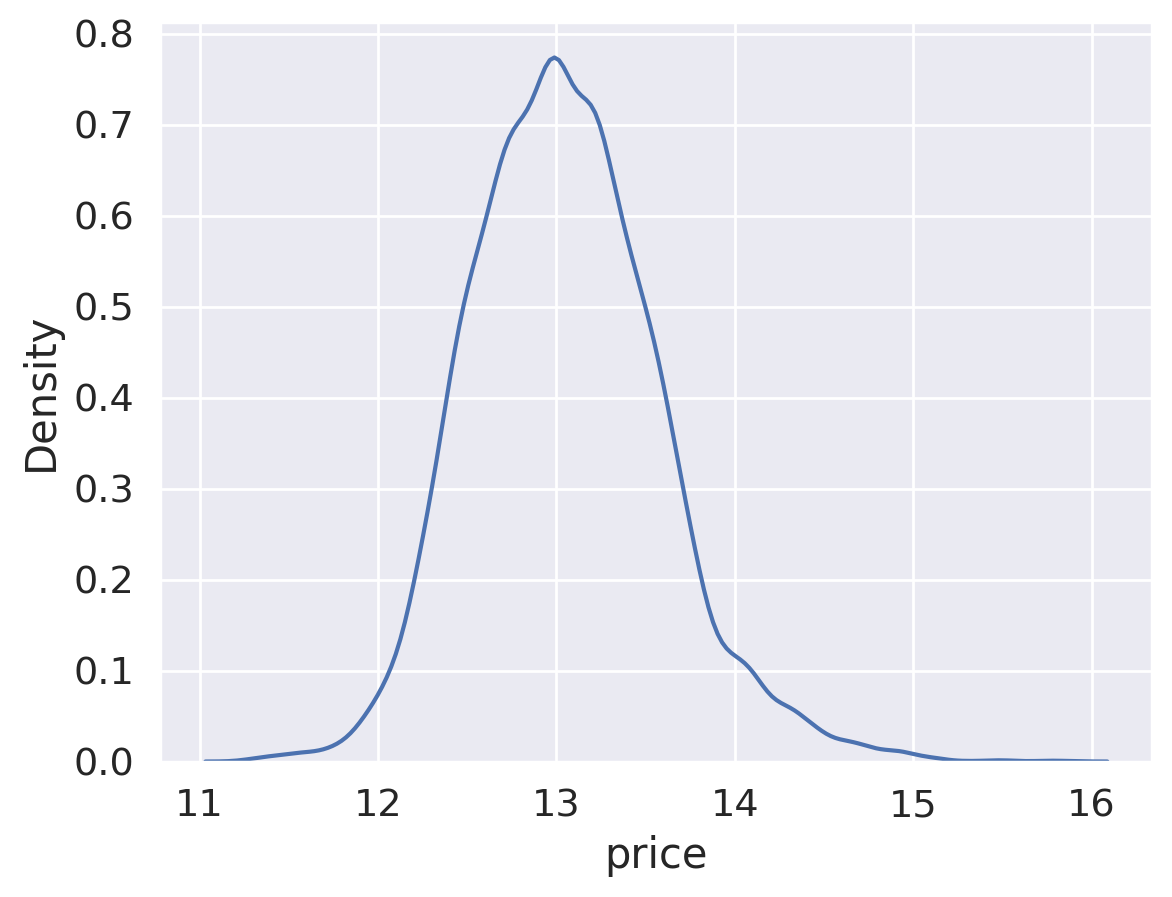

In [ ]:
sns.kdeplot(y)

In [ ]:
import scipy as sp

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


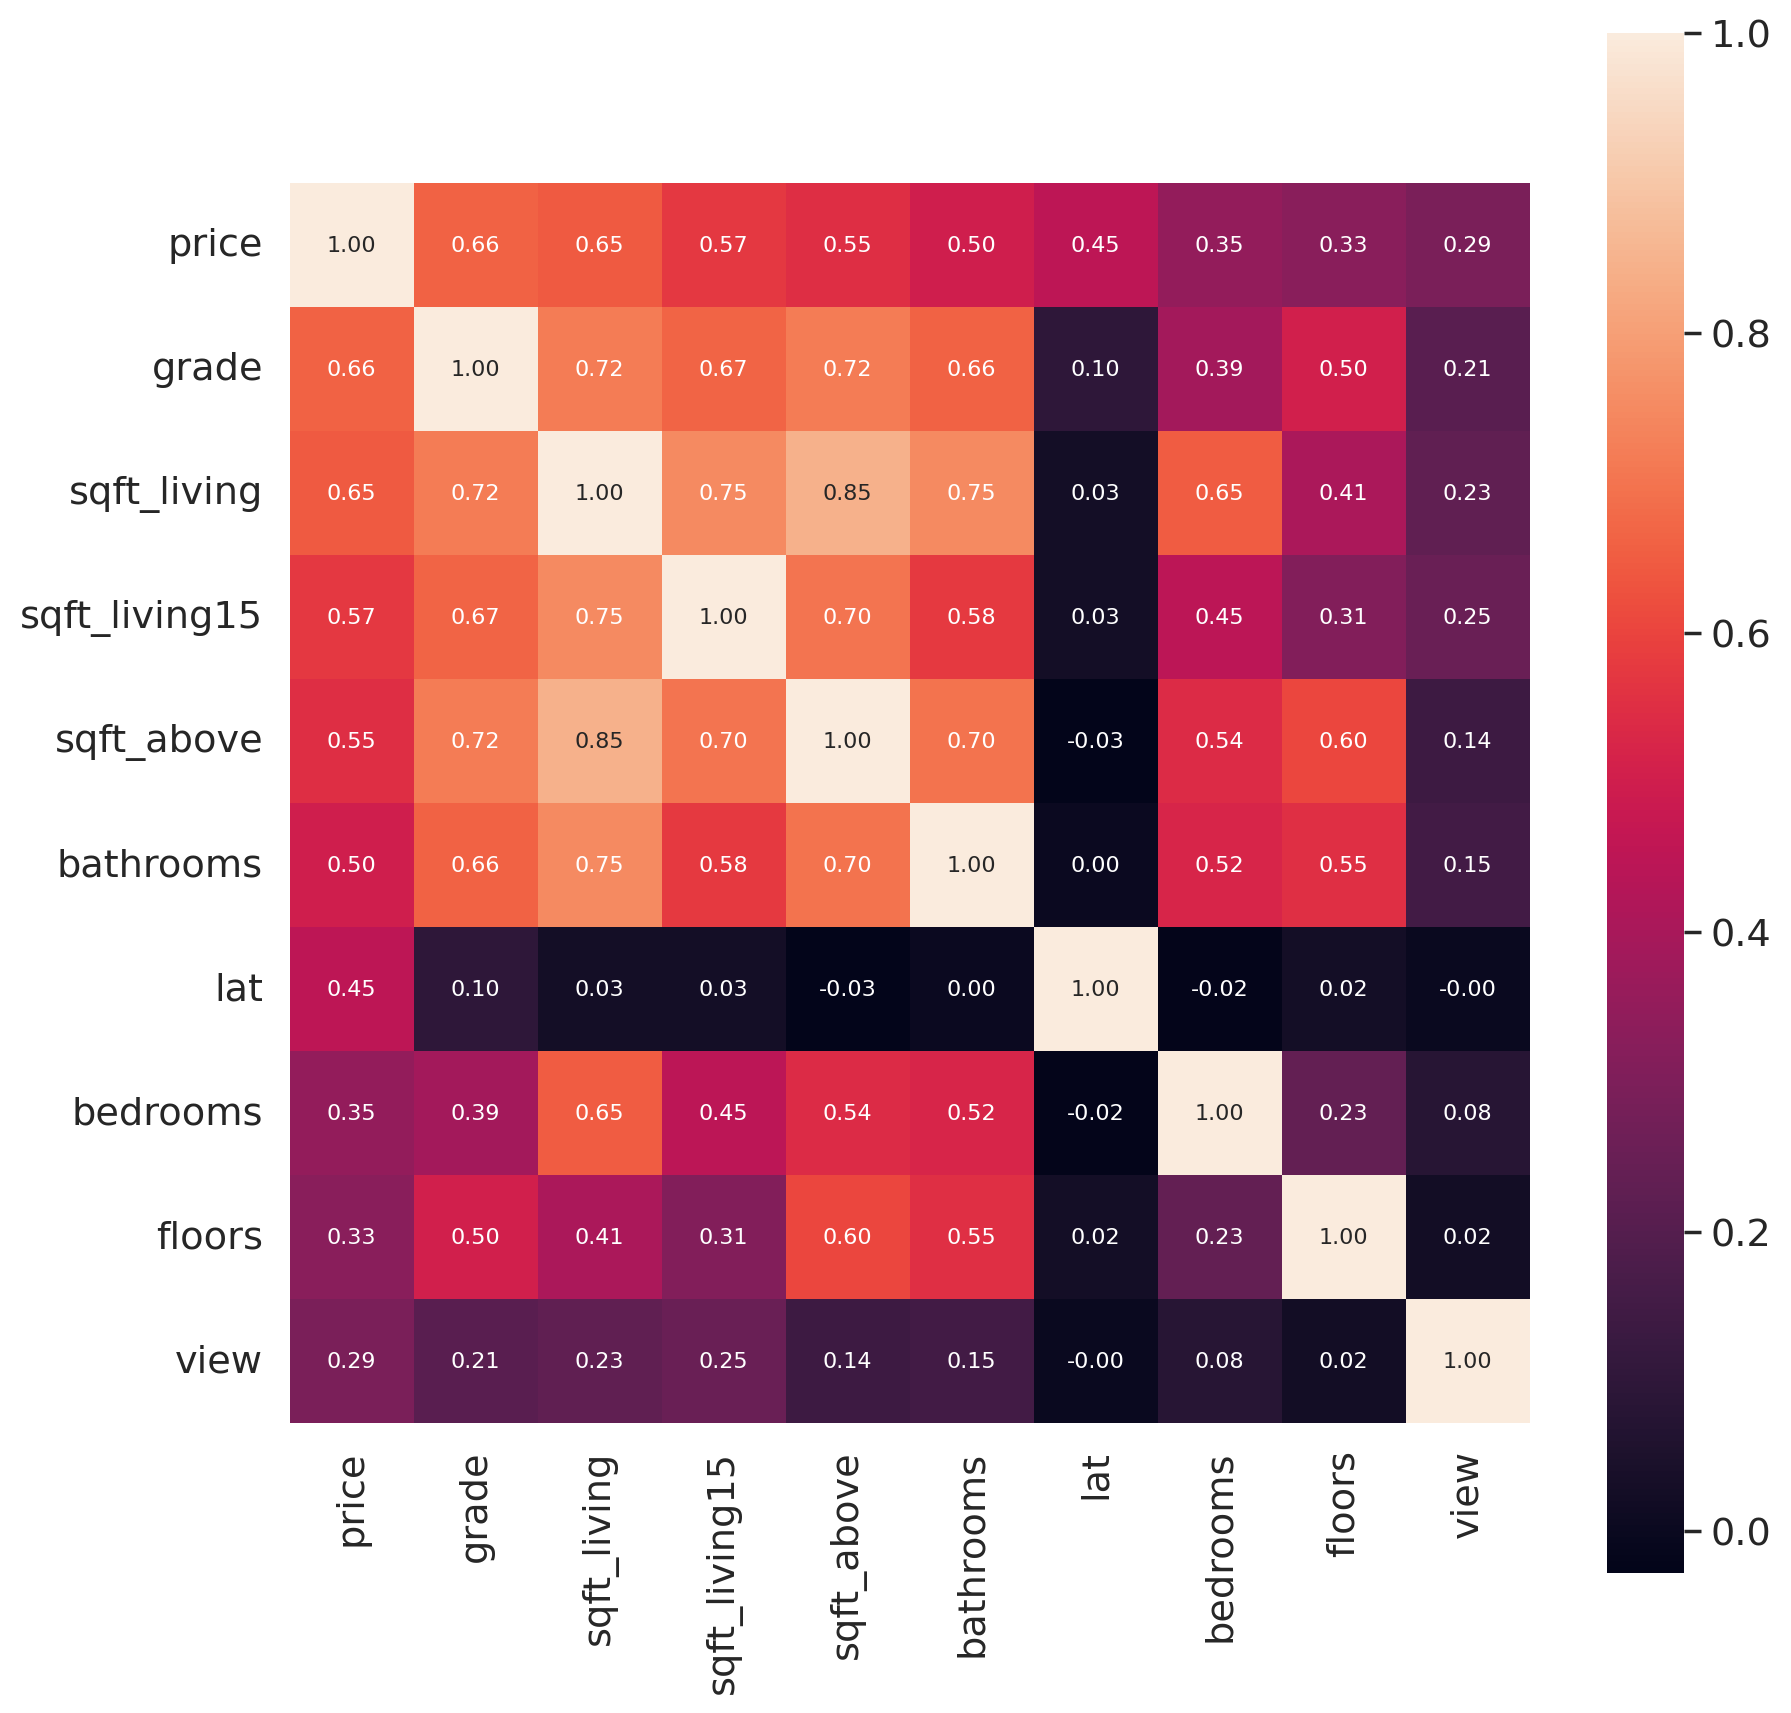

In [ ]:
cor_abs = abs(train.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=10, columns='price').index

cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0]

print(cor_cols.values)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor,fmt='.2f',annot=True,square=True,annot_kws={'size':8},xticklabels=cor_cols.values,yticklabels=cor_cols.values)
plt.show()

<Axes: xlabel='grade', ylabel='price'>

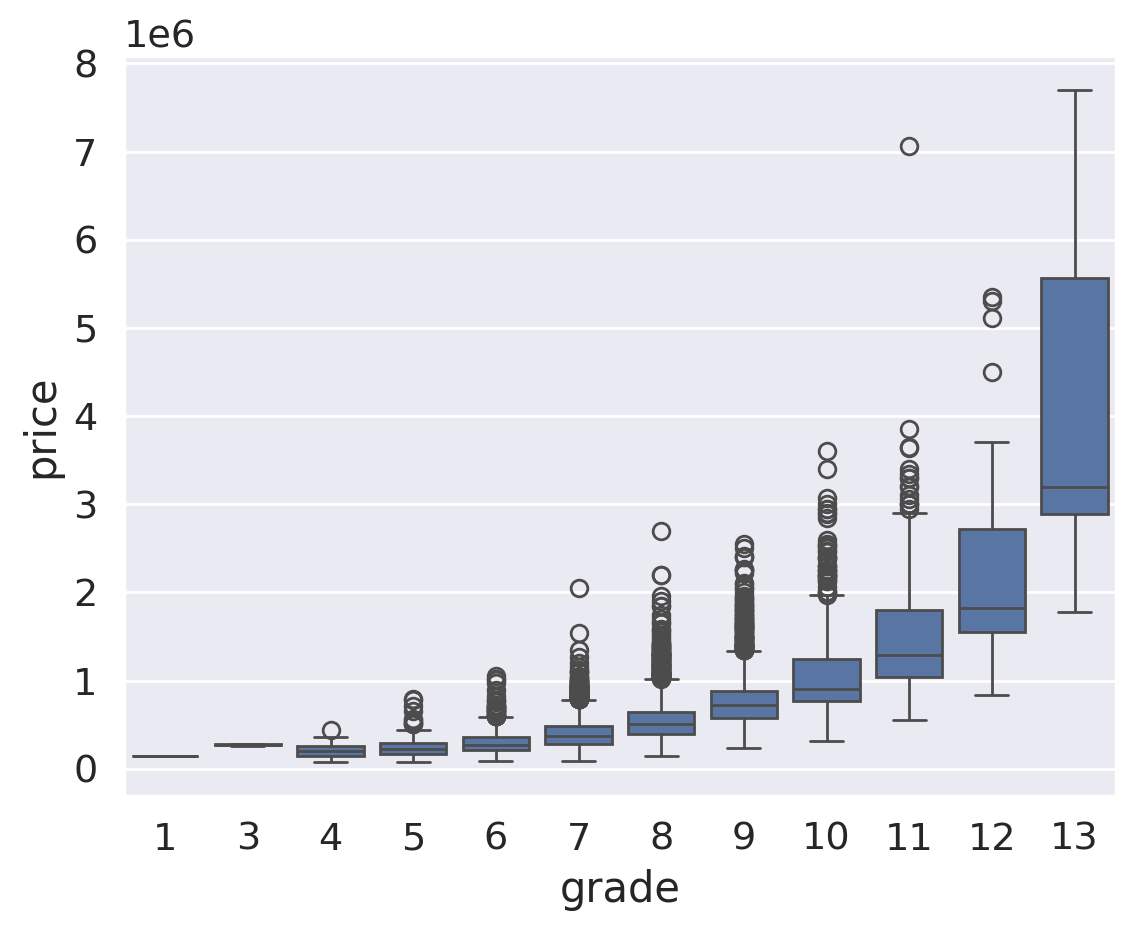

In [ ]:
sns.boxplot(data=train,x='grade',y='price')

In [ ]:
# 등급 3의 경우 값이 큰 이유
# 등급 7,8,9에서 이상치가 많은 이유
# 등급 8과 11에서 차이가 큰 이상치가 나타나는 이유

<Axes: xlabel='sqft_living', ylabel='price'>

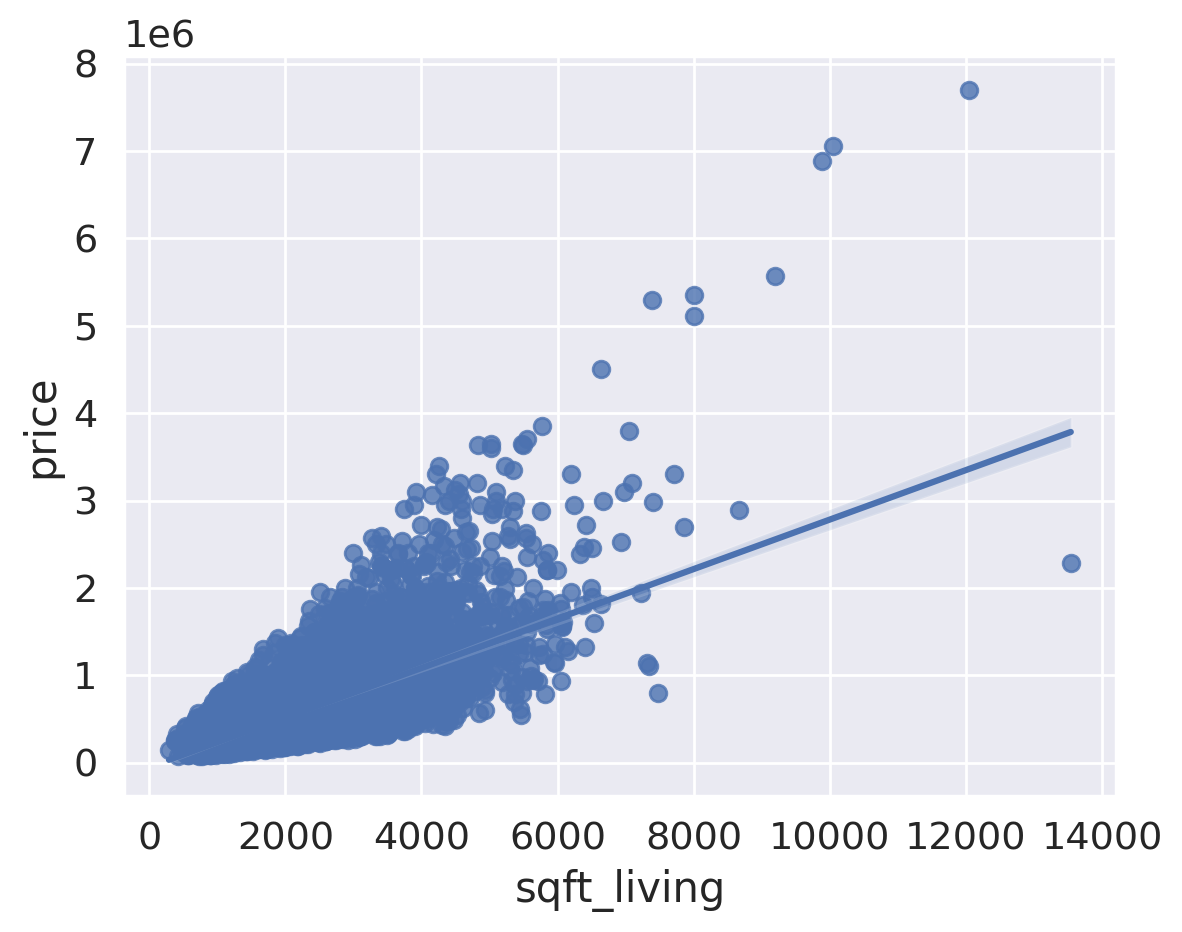

In [ ]:
sns.regplot(x='sqft_living', y="price", data=train)

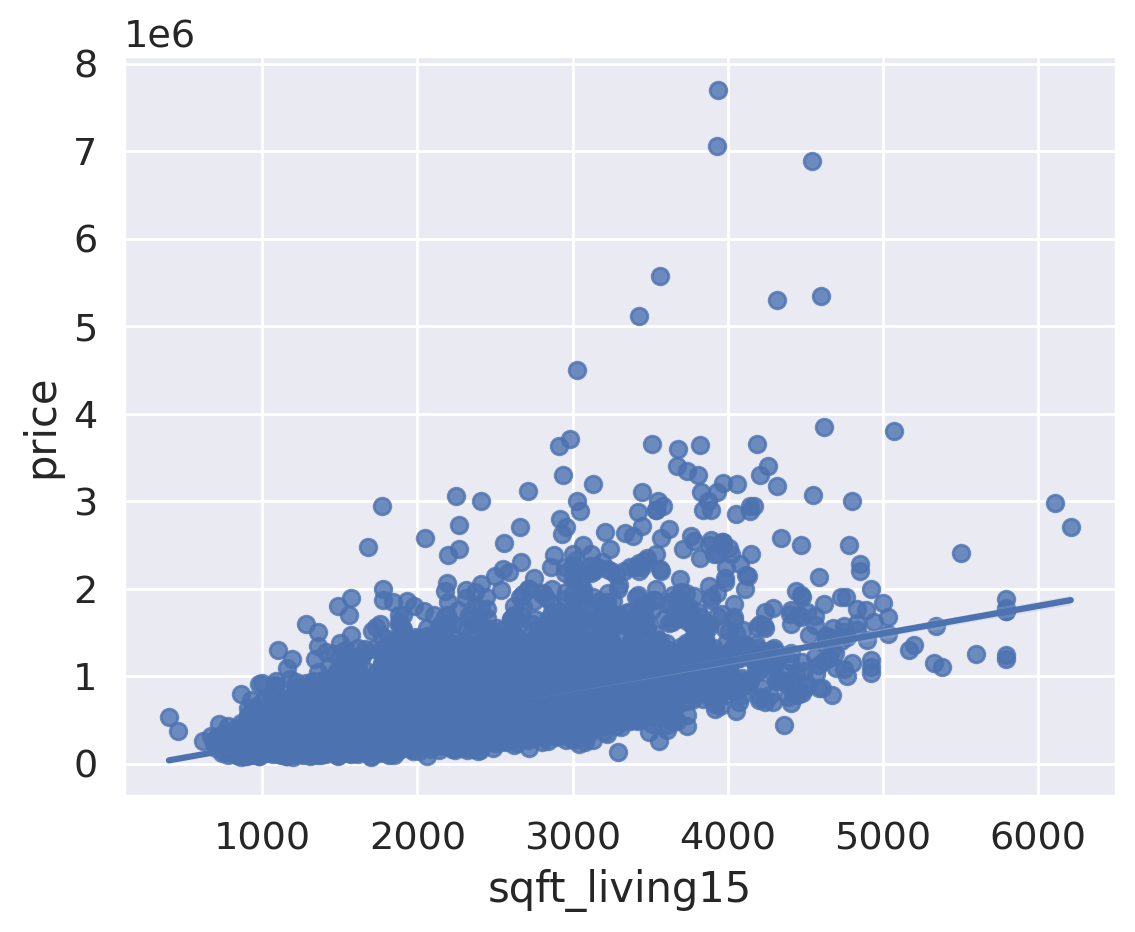

In [ ]:
fig = sns.regplot(x='sqft_living15', y="price", data=train)

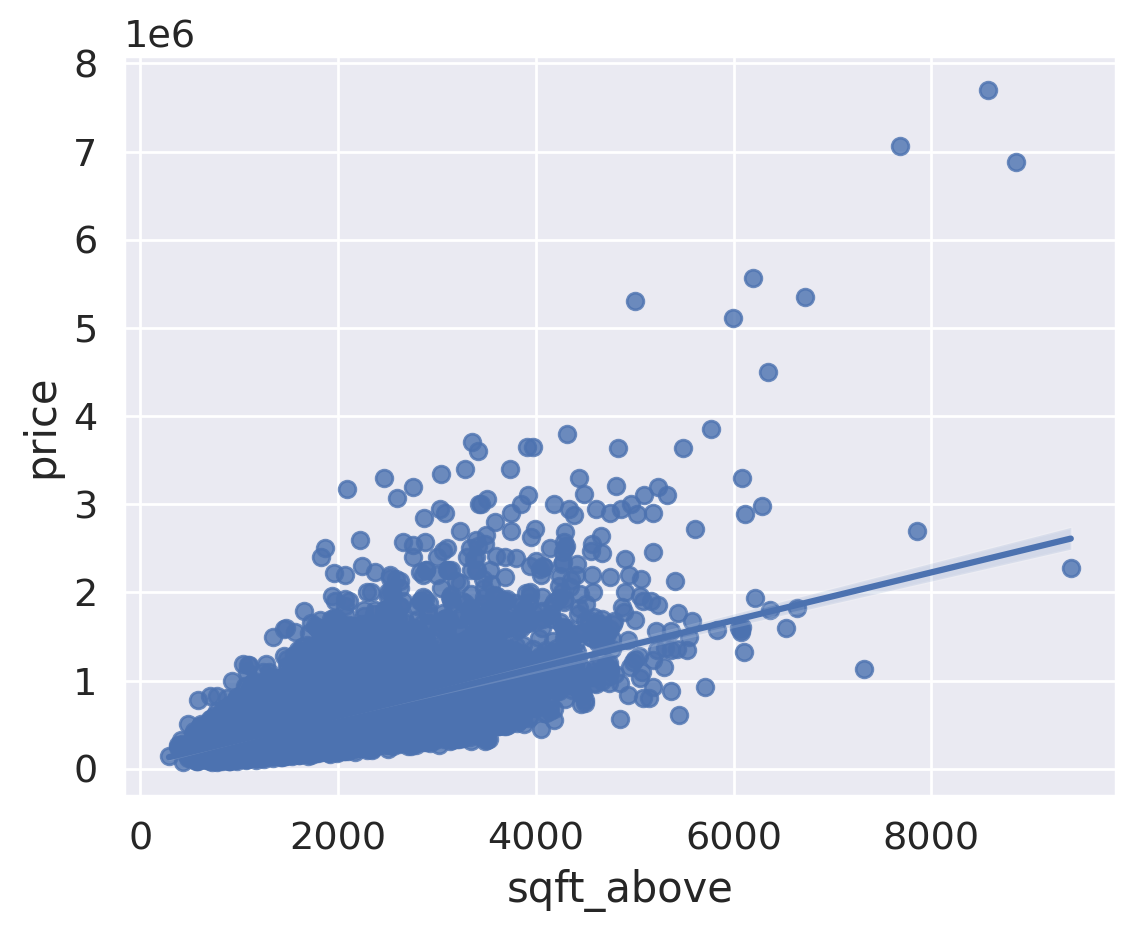

In [ ]:
fig = sns.regplot(x='sqft_above', y="price", data=train)

In [ ]:
# plt.subplots(figsize=(18,6))
# fig = sns.boxplot(x='bathrooms', y="price", data=train)

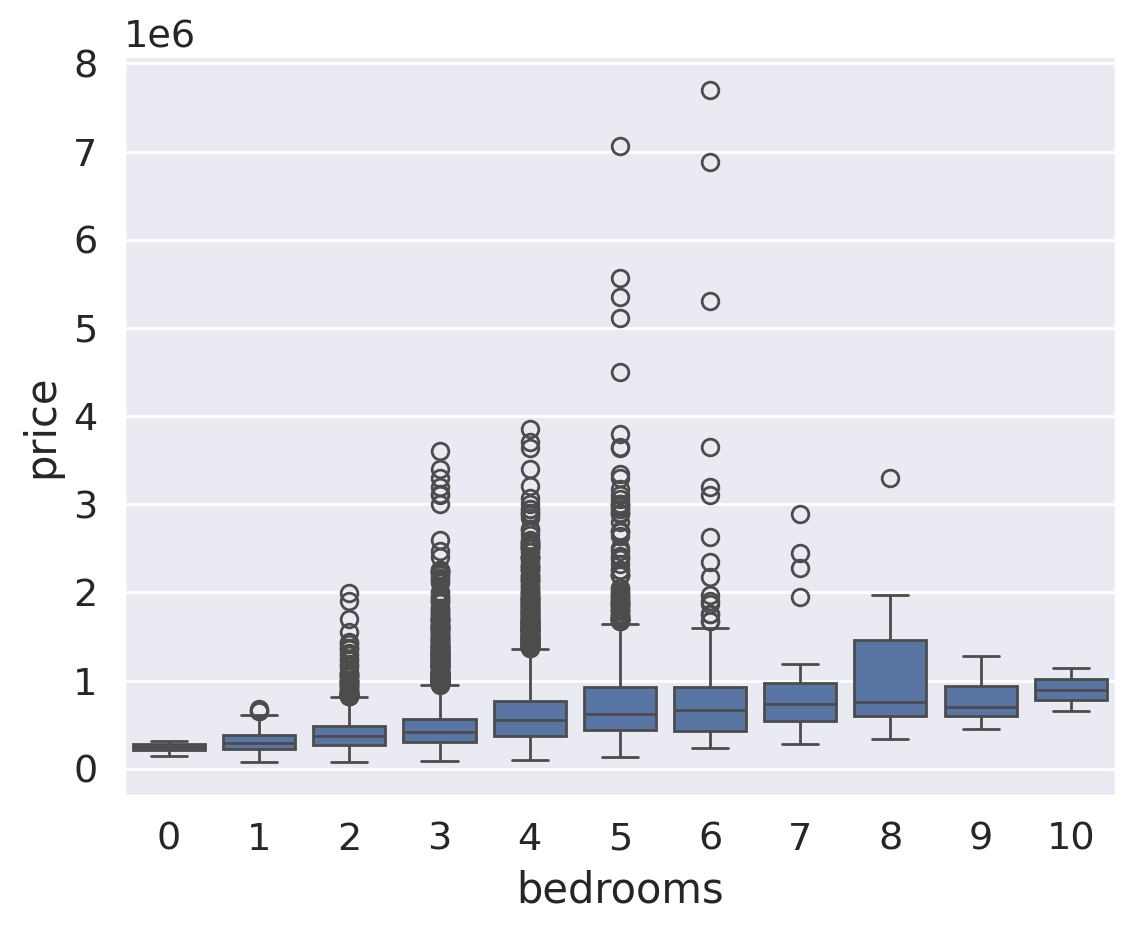

In [ ]:
fig = sns.boxplot(x='bedrooms', y="price", data=train)

In [ ]:
columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']

for col in columns:
  print("{} : {} ".format(col,len(train[col].unique())))

bedrooms : 11 
bathrooms : 29 
floors : 6 
waterfront : 2 
view : 5 
condition : 5 
grade : 12 


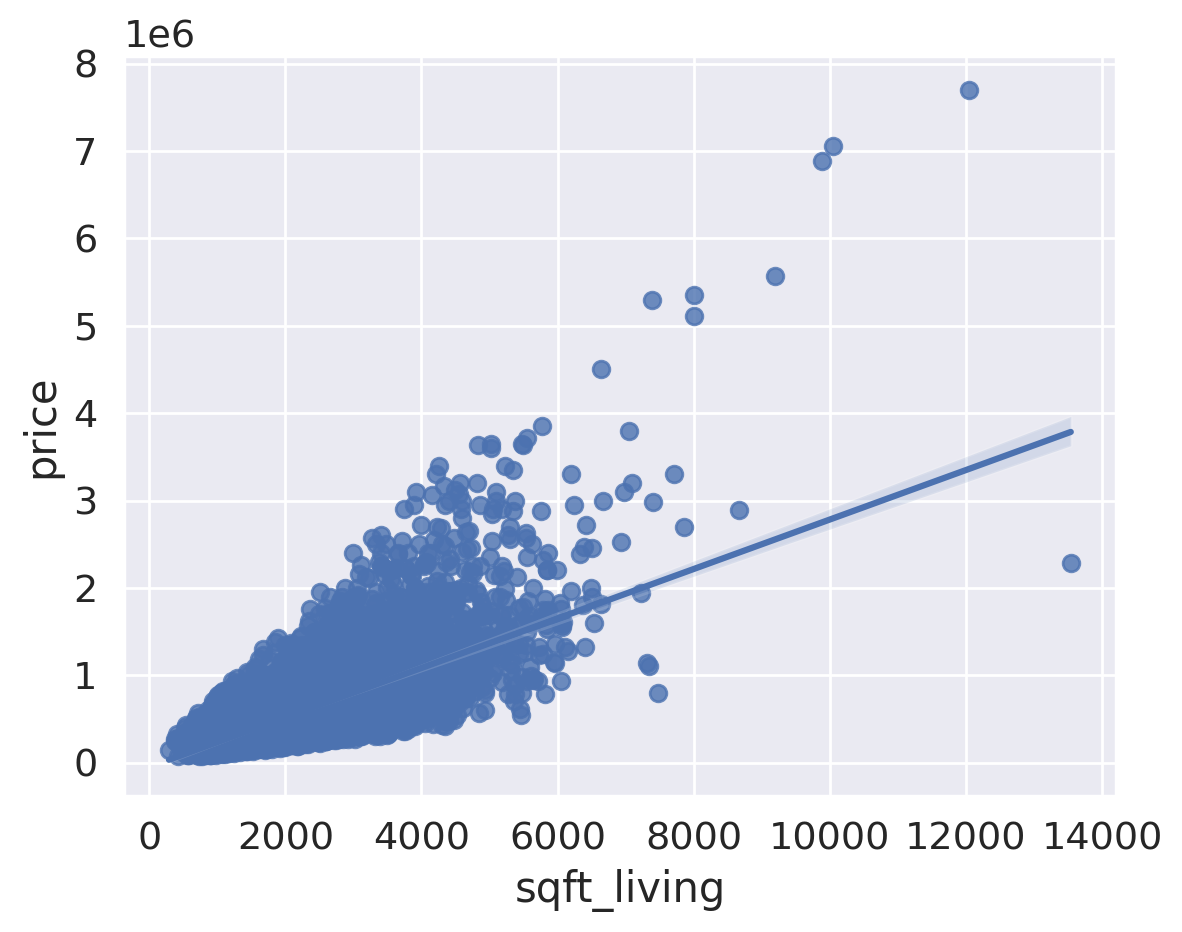

In [ ]:
fig = sns.regplot(x='sqft_living', y="price", data=train)

In [ ]:
train.loc[train['sqft_living']>13000].T

,8912
id,8.912000e+03
date,2.014050e+05
price,2.280000e+06
bedrooms,7.000000e+00
bathrooms,8.000000e+00
sqft_living,1.354000e+04
sqft_lot,3.077520e+05
floors,3.000000e+00
waterfront,0.000000e+00
view,4.000000e+00


In [ ]:
train = train[train['id']!=8912]

In [ ]:
y=y[y.index!=8912]

<Axes: xlabel='grade', ylabel='price'>

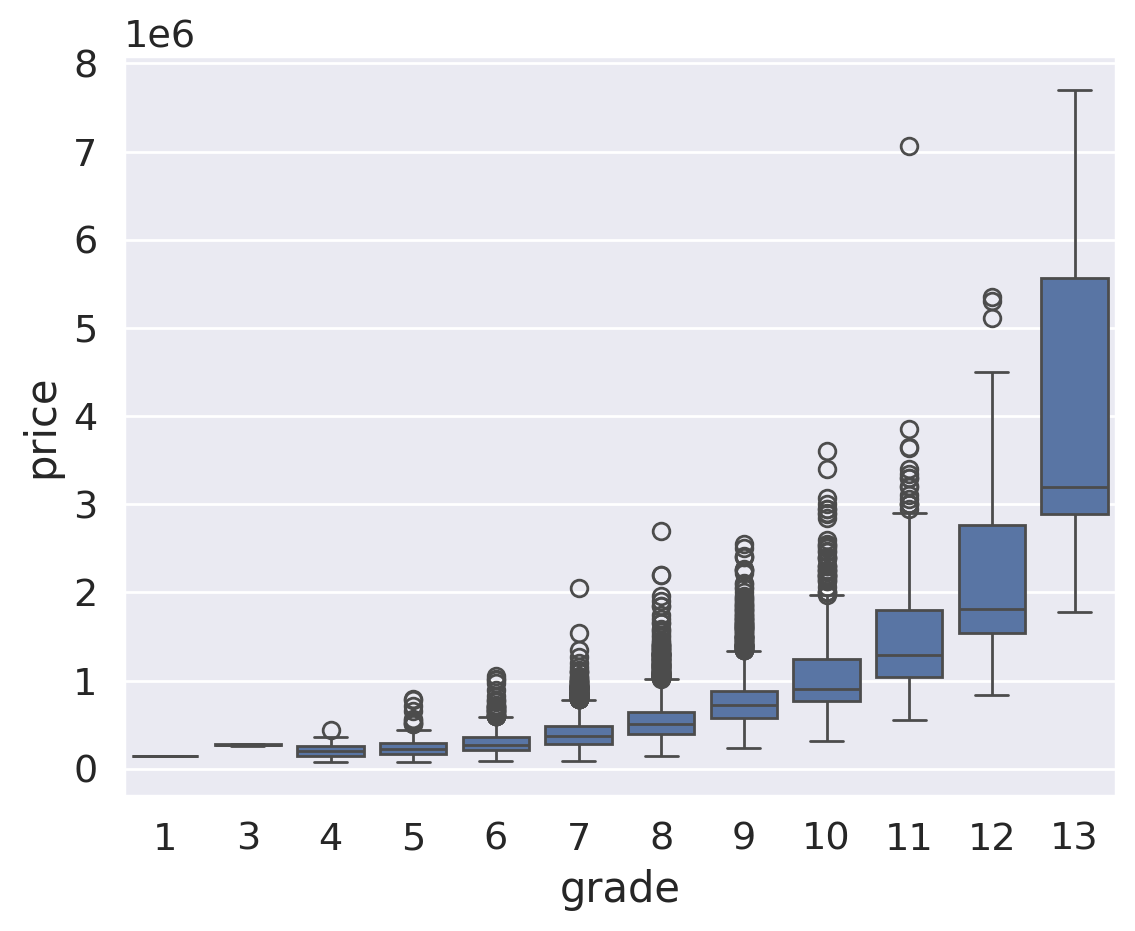

In [ ]:
sns.boxplot(x='grade', y="price", data=train)

In [ ]:
train.loc[(train['price']>12)&(train['grade']==3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,201502,262000.0,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,201411,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [ ]:
train.loc[(train['price']>14.7)&(train['grade']==8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,201504,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
18,18,201411,329000.0,3,2.25,2450,6500,2.0,0,0,...,8,2450,0,1985,0,98030,47.3739,-122.172,2200,6865
20,20,201406,937000.0,3,1.75,2450,2691,2.0,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
21,21,201412,667000.0,3,1.00,1400,1581,1.5,0,0,...,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15023,15023,201410,350000.0,4,2.75,2500,5995,2.0,0,0,...,8,2500,0,2008,0,98042,47.3749,-122.107,2530,5988
15028,15028,201504,467000.0,3,2.50,1425,1179,3.0,0,0,...,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
15029,15029,201408,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
15032,15032,201405,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509


In [ ]:
train.loc[(train['price']>15.5)&(train['grade']==11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
47,47,201409,1040000.0,5,3.25,4770,50094,1.0,0,0,...,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917
191,191,201505,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
192,192,201410,1365000.0,4,4.75,5310,57346,2.0,0,0,...,11,5310,0,1989,0,98077,47.7285,-122.042,4180,47443
222,222,201406,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
275,275,201407,1350000.0,5,3.50,4800,14984,2.0,0,2,...,11,3480,1320,1998,0,98006,47.5543,-122.148,4050,19009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,14975,201406,1325000.0,4,4.00,4420,16526,2.0,0,0,...,11,4420,0,2013,0,98075,47.5914,-122.027,3510,50447
14988,14988,201408,1057000.0,2,1.50,2370,184231,2.0,0,0,...,11,2370,0,2005,0,98045,47.4543,-121.778,3860,151081
14990,14990,201412,1375000.0,5,4.50,4350,13405,2.0,0,0,...,11,4350,0,2014,0,98074,47.6018,-122.060,3990,7208
15021,15021,201405,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063


In [ ]:
train=train.loc[train['id']!=2302]
train=train.loc[train['id']!=4123]
train=train.loc[train['id']!=7173]
train=train.loc[train['id']!=2775]

In [ ]:
y=y.loc[y.index!=2302]
y=y.loc[y.index!=4123]
y=y.loc[y.index!=7173]
y=y.loc[y.index!=2775]

In [ ]:
y.shape

(15030,)

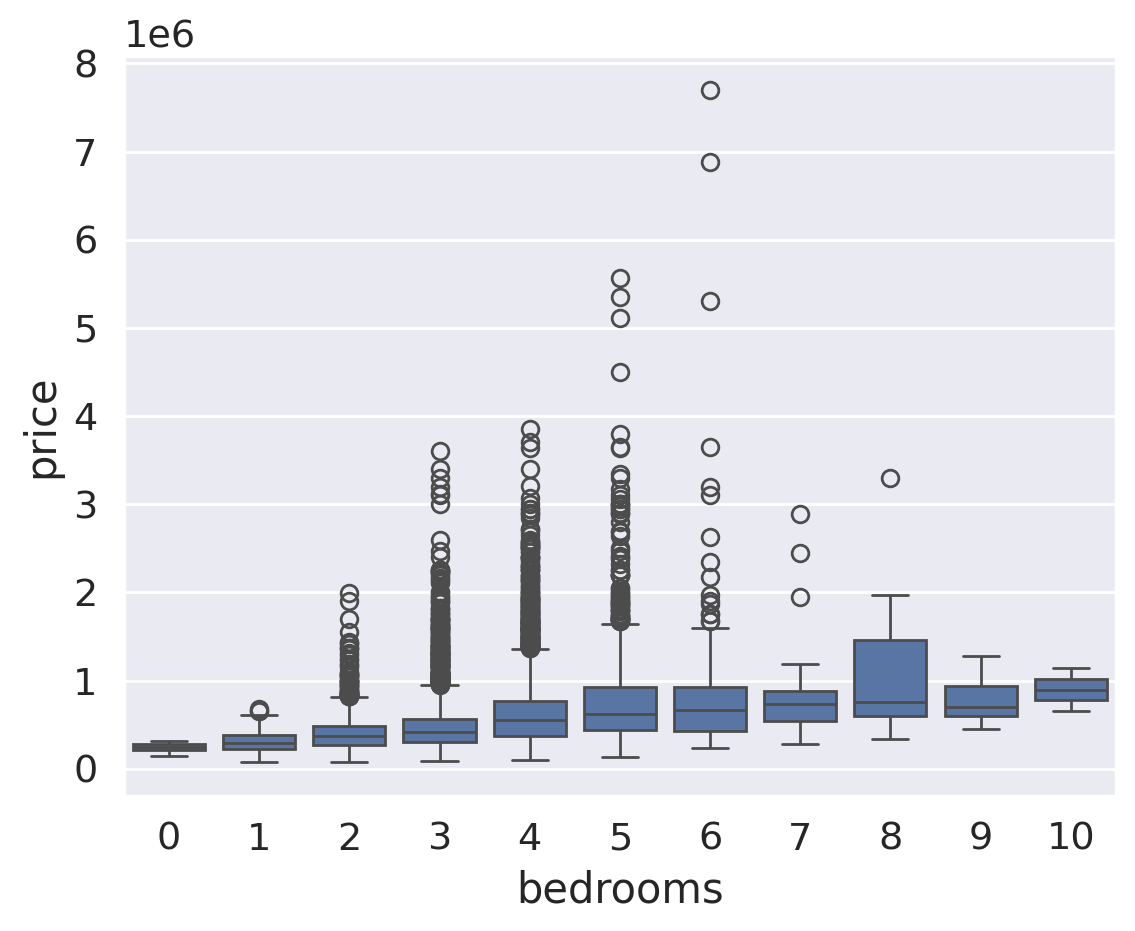

In [ ]:
fig = sns.boxplot(x='bedrooms', y="price", data=train)

In [ ]:
from scipy.stats import skew
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for sk in skew_columns:
  train[sk] = np.log1p(train[sk])
  test[sk] = np.log1p(test[sk])
  print(skew(train[sk]), skew(test[sk]))

-0.04447761338613837 -0.031847516308554265
0.9886981769908587 0.9002366365559193
0.2334320595898855 0.2894268167593473
0.488558046609949 0.47328248621376795


<Axes: xlabel='sqft_above', ylabel='Density'>

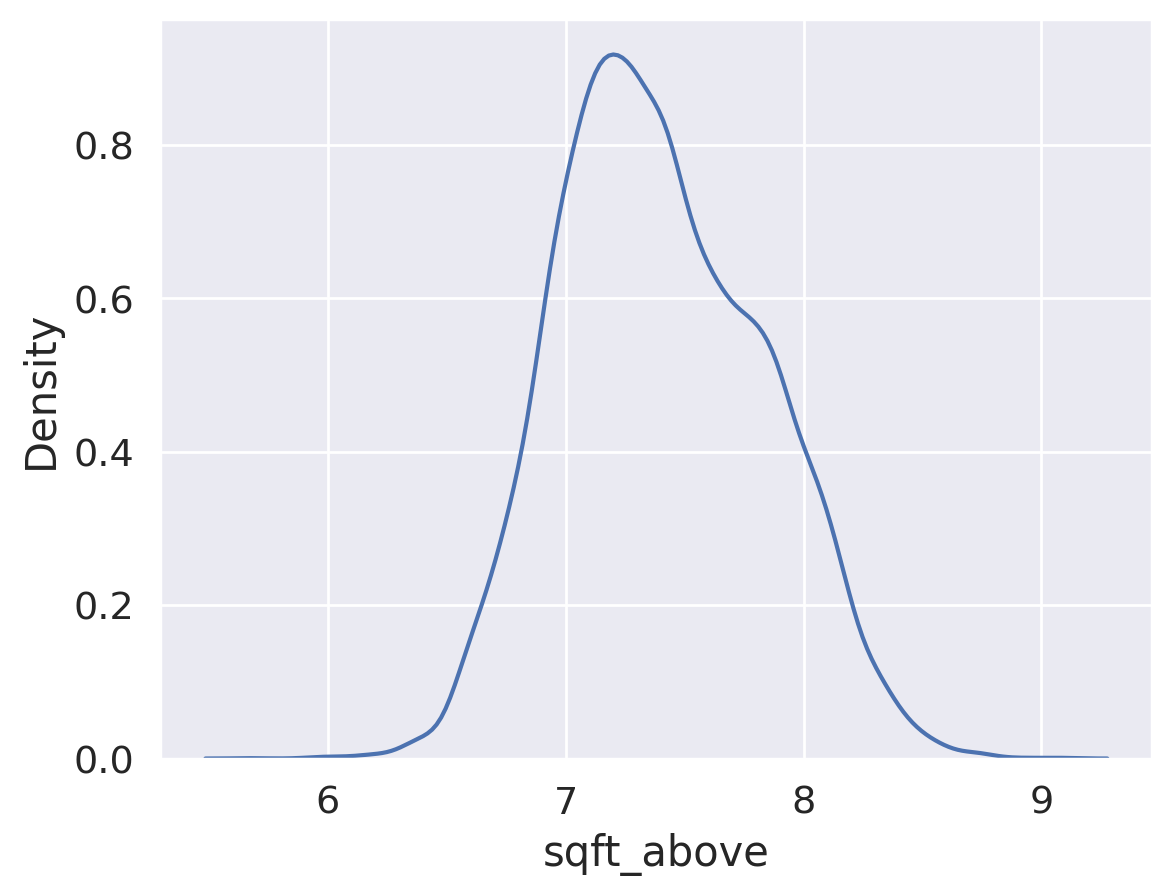

In [ ]:
sns.kdeplot(train['sqft_above'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15030 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15030 non-null  int64  
 1   date           15030 non-null  int64  
 2   price          15030 non-null  float64
 3   bedrooms       15030 non-null  int64  
 4   bathrooms      15030 non-null  float64
 5   sqft_living    15030 non-null  float64
 6   sqft_lot       15030 non-null  float64
 7   floors         15030 non-null  float64
 8   waterfront     15030 non-null  int64  
 9   view           15030 non-null  int64  
 10  condition      15030 non-null  int64  
 11  grade          15030 non-null  int64  
 12  sqft_above     15030 non-null  float64
 13  sqft_basement  15030 non-null  float64
 14  yr_built       15030 non-null  int64  
 15  yr_renovated   15030 non-null  int64  
 16  zipcode        15030 non-null  int64  
 17  lat            15030 non-null  float64
 18  long       

In [ ]:
for df in [train,test]:
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [ ]:
for df in [train,test]:
    # 방의 전체 갯수
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']

    # 거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']

    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']

    # 면적 대비 거실의 비율
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']

    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15']

    # 재건축 여부
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
# train['per_price'] = train['price']/train['sqft_total_size']
# zipcode_price = train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()
# train = pd.merge(train,zipcode_price,how='left',on='zipcode')
# test = pd.merge(test,zipcode_price,how='left',on='zipcode')



In [ ]:
# for df in [train,test]:
#     df['zipcode_mean'] = df['mean'] * df['sqft_total_size']
#     df['zipcode_var'] = df['var'] * df['sqft_total_size']
#     del df['mean']; del df['var']

In [ ]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated
0,0,201410,221900.0,3,1.00,7.074117,8.639588,1.0,0,0,...,47.5112,-122.257,1340,5650,4.00,0.818803,7.074117,1.0,0.237168,0
1,1,201502,180000.0,2,1.00,6.647688,9.210440,1.0,0,0,...,47.7379,-122.233,2720,8062,3.00,0.721756,6.647688,1.0,0.337385,0
2,2,201502,510000.0,3,2.00,7.427144,8.997271,1.0,0,0,...,47.6168,-122.045,1800,7503,5.00,0.825489,7.427144,1.0,0.239904,0
3,3,201406,257500.0,3,2.25,7.447751,8.827615,2.0,0,0,...,47.3097,-122.327,2238,6819,5.25,0.843688,7.447751,1.0,0.328201,0
4,4,201501,291850.0,3,1.50,6.966967,9.181118,1.0,0,0,...,47.4095,-122.315,1650,9711,4.50,0.758837,6.966967,1.0,0.169910,0


In [ ]:
# del train['price']
# del train['id']
# print(train.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [ ]:
# def rmse(y_test, y_pred):
#     return np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
# def get_scores(models,train,y):
#     df = {}
#     x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=random_state)
#     for model in models:
#         model_name = model.__class__.__name__
#         model.fit(x_train,y_train)
#         y_pred = model.predict(x_test)

#         df[model_name] = rmse(y_test, y_pred)
#     score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
#     return score_df

In [ ]:
def get_scores(models,train,y):
    df = {}
    x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=random_state)
    for model in models:
        model_name = model.__class__.__name__
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        df[model_name] = rmse(y_test, y_pred)
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return score_df

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

train_columns = [c for c in train.columns if c not in ['id','price','per_price']]

model = sm.OLS(train['price'].values, train[train_columns])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              5815.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                        0.00
Time:                        11:21:58   Log-Likelihood:                     -2.0533e+05
No. Observations:               15030   AIC:                                  4.107e+05
Df Residuals:                   15007   BIC:                                  4.109e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
drops = ['bathrooms','bedrooms','sqft_above','sqft_basement','sqft_living','sqft_lot','sqft_living15','yr_renovated','date','id','sqft_ratio15','sqft_ratio_1']

In [ ]:
for df in [train,test]:
    df.drop(drops,axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["Features"] = train.columns
vif["VIF Values"] = [variance_inflation_factor(
    train.values, i) for i in range(train.shape[1])]

vif.sort_values(by='VIF Values',ascending=False)

,Features,VIF Values
7,zipcode,1.631647e+06
9,long,1.333474e+06
8,lat,1.558925e+05
6,yr_built,9.249765e+03
12,sqft_ratio,2.824922e+02
5,grade,1.257023e+02
4,condition,3.536124e+01
11,total_rooms,2.908730e+01
1,floors,2.144676e+01
13,sqft_total_size,1.846232e+01


['price' 'grade' 'sqft_total_size' 'total_rooms' 'lat' 'floors'
 'sqft_ratio' 'view' 'waterfront' 'is_renovated' 'yr_built' 'long'
 'sqft_lot15' 'condition' 'zipcode']


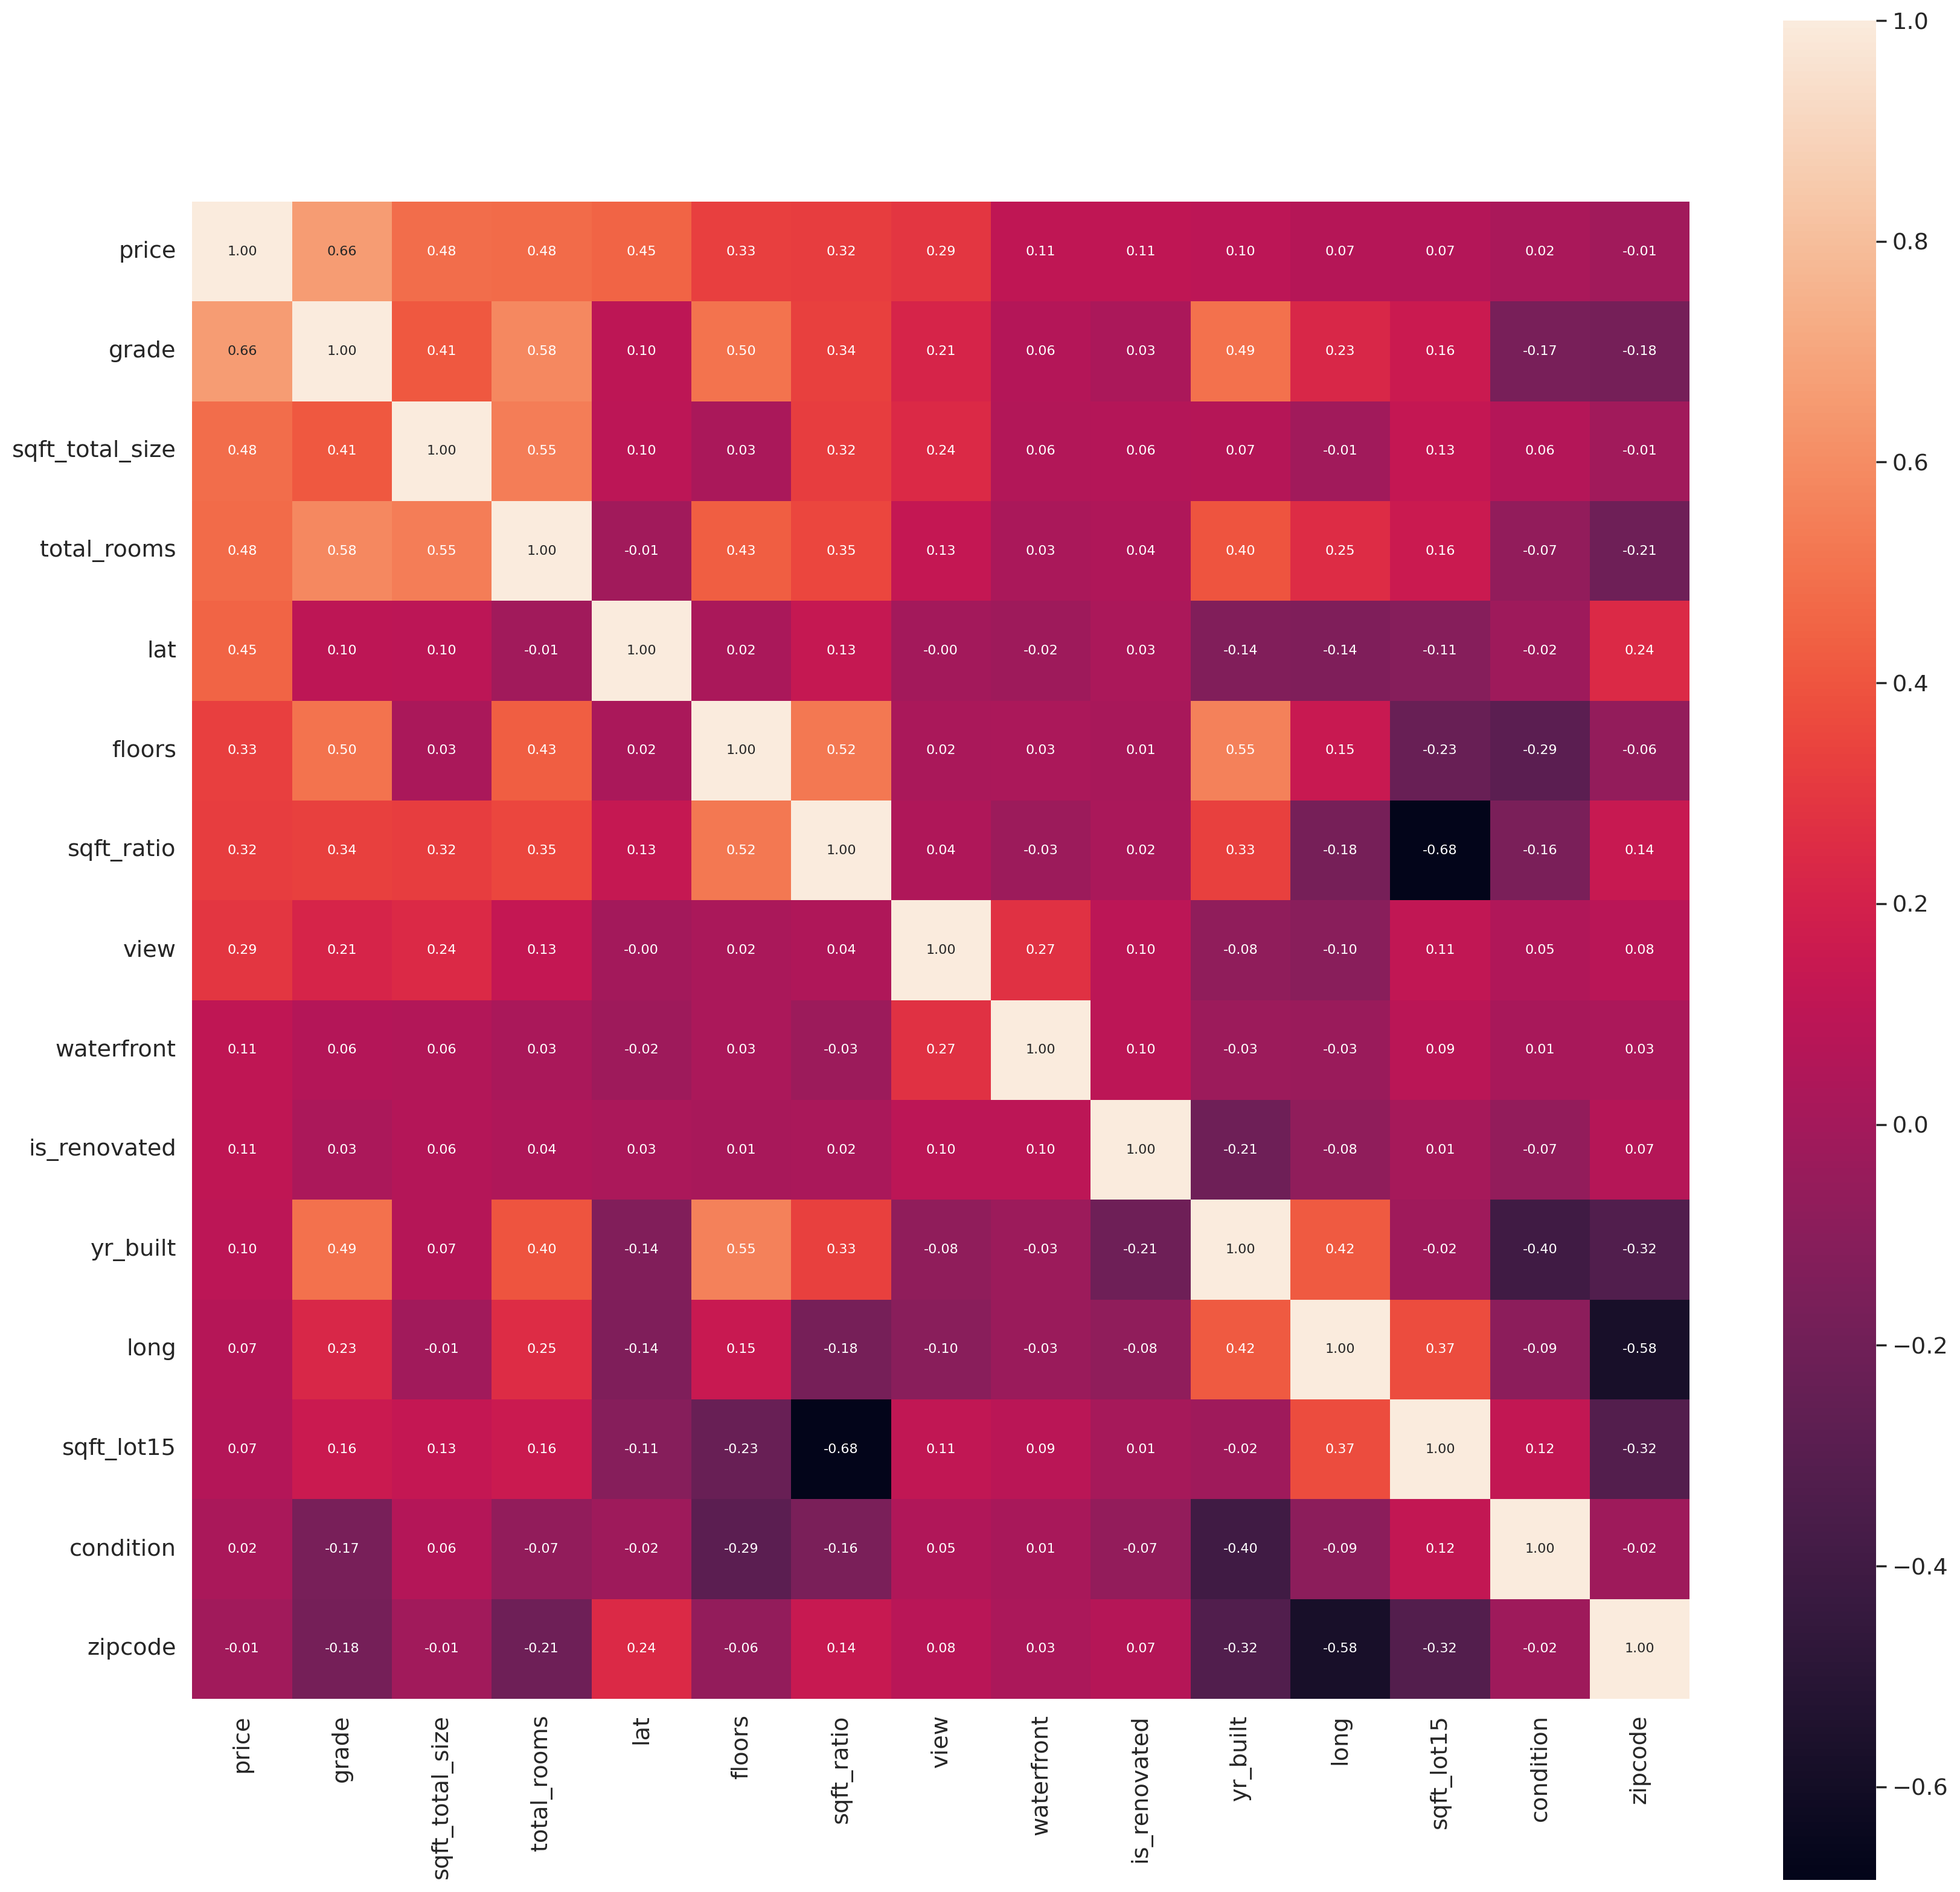

In [ ]:
cor_abs = abs(train.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=train.shape[1], columns='price').index

cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0]

print(cor_cols.values)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.25)
sns.heatmap(cor,fmt='.2f',annot=True,square=True,annot_kws={'size':8},xticklabels=cor_cols.values,yticklabels=cor_cols.values)
plt.show()

In [ ]:
train['price']

,price
0,221900.0
1,180000.0
2,510000.0
3,257500.0
4,291850.0
...,...
15030,610685.0
15031,1007500.0
15032,360000.0
15033,400000.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train.drop('price',axis=1),y,test_size=0.2,random_state=random_state,shuffle=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# parameters = {
#     'n_estimators': [100, 150, 200, 250, 300],
#     'max_depth': [1,2,3,4,5],
# }
# rfr = RandomForestRegressor(random_state=random_state)

# model = GridSearchCV(rfr, parameters)
# model.fit(x_train, y_train)

In [ ]:
# y_pred = model.predict(x_test)
# print(rmse(y_test, y_pred))

In [ ]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso

# random_state = 42

# lr = LinearRegression()
# ridge = Ridge()
# lasso = Lasso()
# gboost = GradientBoostingRegressor(random_state=random_state)
# xgboost = XGBRegressor(random_state=random_state)
# lightgbm = LGBMRegressor(random_state=random_state)
# rdforest = RandomForestRegressor(random_state=random_state)

# models = [gboost, xgboost, lightgbm, rdforest]
# # models = [gboost]

In [ ]:
# for model in models:
#     model_name = model.__class__.__name__
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     print(model_name, rmse(y_test, y_pred))

In [ ]:
# params = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'subsample': [0.8, 0.9],
#     'min_samples_split':[2,4,6]
# }

In [ ]:
# grid_search_gb = GridSearchCV(estimator=gboost, param_grid=params, cv=5, n_jobs=-1)
# grid_search_gb.fit(x_train, y_train)

In [ ]:
# y_pred = grid_search_gb.predict(x_test)
# print("gboost  :  ",rmse(y_test, y_pred))

In [ ]:
# grid_search_gb.best_params_

In [ ]:
total = 0

In [ ]:
gb = GradientBoostingRegressor(random_state=random_state,learning_rate=0.1,min_samples_split=4,n_estimators=1000,subsample=0.9)
gb.fit(train.drop('price',axis=1), y)
gb_pred = gb.predict(x_test)
print("gboost  :  ",rmse(y_test, gb_pred))
gb_score=rmse(y_test, gb_pred)
total += rmse(y_test, gb_pred)

gboost  :   88794.37184618074


In [ ]:
# params_xgb = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 0.9],
#     'max_features': [0.8, 0.9]
# }

In [ ]:
# grid_search_xgb= GridSearchCV(estimator=xgboost,param_grid=params_xgb,cv=5,n_jobs=-1)

In [ ]:
# grid_search_xgb.fit(x_train, y_train)

In [ ]:
# y_pred = grid_search_xgb.predict(x_test)
# print("xgboost  :  ",rmse(y_test, y_pred))

In [ ]:
# grid_search_xgb.best_params_

In [ ]:
xgb = XGBRegressor(random_state=random_state,learning_rate=0.05,n_estimators=1000,max_depth=5,subsample=0.8,max_features=0.8)
xgb.fit(train.drop('price',axis=1), y)
xgb_pred = xgb.predict(x_test)
print("xgboost  :  ",rmse(y_test, xgb_pred))
xgb_score=rmse(y_test, xgb_pred)
total += rmse(y_test, xgb_pred)

xgboost  :   67857.91894347836


In [ ]:
# params_rf = {
#     'n_estimators': [100, 500, 1000 , 1500],
#     'max_depth': [3, 5, 7, 9],
#     'max_features': [0.8, 0.9]
# }

In [ ]:
# grid_search_rf = GridSearchCV(estimator=rdforest, param_grid=params_rf, cv=5, n_jobs=-1)
# grid_search_rf.fit(x_train, y_train)

In [ ]:
# y_pred = grid_search_rf.predict(x_test)
# print("rf  :  ",rmse(y_test, y_pred))

In [ ]:
# grid_search_rf.best_params_

In [ ]:
train.head()

,price,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,is_renovated
0,221900.0,1.0,0,0,3,7,1955,98178,47.5112,-122.257,5650,4.00,0.818803,7.074117,0
1,180000.0,1.0,0,0,3,6,1933,98028,47.7379,-122.233,8062,3.00,0.721756,6.647688,0
2,510000.0,1.0,0,0,3,8,1987,98074,47.6168,-122.045,7503,5.00,0.825489,7.427144,0
3,257500.0,2.0,0,0,3,7,1995,98003,47.3097,-122.327,6819,5.25,0.843688,7.447751,0
4,291850.0,1.0,0,0,3,7,1963,98198,47.4095,-122.315,9711,4.50,0.758837,6.966967,0


In [ ]:
y.head()

,price
0,12.309987
1,12.100718
2,13.142168
3,12.458779
4,12.583999


In [ ]:
rf = RandomForestRegressor(random_state=random_state,n_estimators=1500,max_depth=9,max_features=0.8)
rf.fit(train.drop('price',axis=1), y)
rf_pred = rf.predict(x_test)
print("rf  :  ",rmse(y_test, rf_pred))
rf_score=rmse(y_test, rf_pred)
total += rmse(y_test, rf_pred)

rf  :   121589.267318836


In [ ]:
# params_lgbm = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'colsample_bytree': [0.8, 0.9],
#     'subsample': [0.8, 0.9],
#     'max_depth': [3, 5]
# }

In [ ]:
# grid_search_lgbm = GridSearchCV(estimator=lightgbm, param_grid=params_lgbm, cv=5, n_jobs=-1)
# grid_search_lgbm.fit(x_train, y_train)

In [ ]:
lgbm = LGBMRegressor(random_state=random_state,n_estimators=3000,learning_rate=0.01,subsample=0.8,max_depth=7)
lgbm.fit(train.drop('price',axis=1), y)
lgbm_pred = lgbm.predict(x_test)
print("lgbm  :  ",rmse(y_test, lgbm_pred))
lgbm_score=rmse(y_test, lgbm_pred)
total += rmse(y_test, lgbm_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 12024, number of used features: 14
[LightGBM] [Info] Start training from score 13.048356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
stack_models = [
    ('gboost', gb),
    ('lightgbm', lgbm),
    ('rdforest', rf)
]

In [ ]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb,n_jobs=-1)
stack_reg.fit(train.drop('price',axis=1), y)
stack_pred = stack_reg.predict(x_test)
print("stack  :  ",rmse(y_test, stack_pred))
stack_score=rmse(y_test, stack_pred)
total += rmse(y_test, stack_pred)

stack  :   109229.27813419068


In [ ]:
# #Weighted Blending
# fo = {
#     'randomforest': rf_pred,
#     'gbr': gb_pred,
#     'xgb': xgb_pred,
#     'lgbm': lgbm_pred,
#     'stacking': stack_pred,
# }

In [ ]:
# fp=fo['randomforest']*(rf_score/total)+fo['gbr']*(gb_score/total)+fo['xgb']*(xgb_score/total)+fo['lgbm']*(lgbm_score/total)+fo['stacking']*(stack_score/total)
# print("stack  :  ",rmse(y_test, fp))

stack  :   95398.35137706944


In [ ]:
xgb_pred2 = xgb.predict(test)

<Axes: ylabel='Density'>

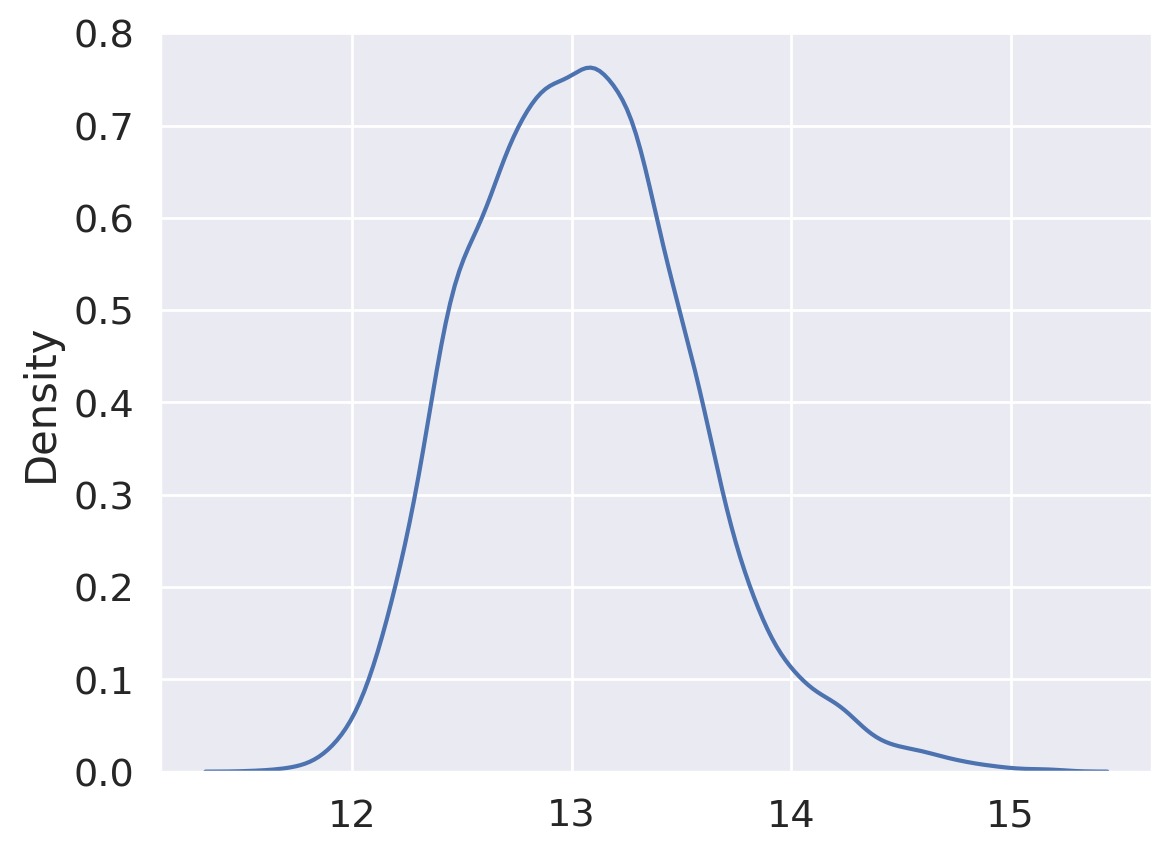

In [ ]:
sns.kdeplot(xgb_pred2)

<Axes: ylabel='Density'>

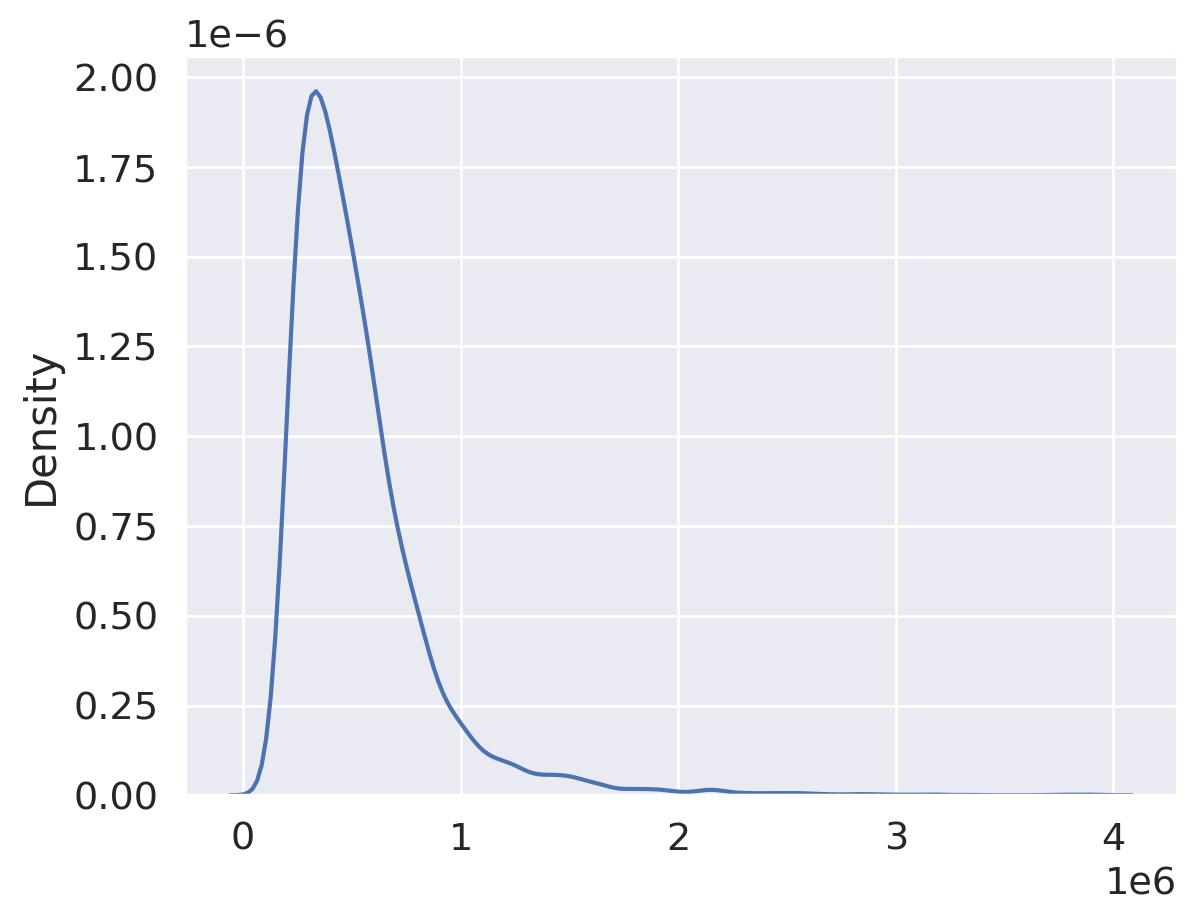

In [ ]:
sns.kdeplot(np.expm1(xgb_pred2))

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   floors           6468 non-null   float64
 1   waterfront       6468 non-null   int64  
 2   view             6468 non-null   int64  
 3   condition        6468 non-null   int64  
 4   grade            6468 non-null   int64  
 5   yr_built         6468 non-null   int64  
 6   zipcode          6468 non-null   int64  
 7   lat              6468 non-null   float64
 8   long             6468 non-null   float64
 9   sqft_lot15       6468 non-null   int64  
 10  total_rooms      6468 non-null   float64
 11  sqft_ratio       6468 non-null   float64
 12  sqft_total_size  6468 non-null   float64
 13  is_renovated     6468 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 707.6 KB


In [ ]:
test2 = pd.read_csv(join(data_path, 'test.csv'))

In [ ]:
submission_xgb = pd.DataFrame({
    "id":test2['id'],
    "price":np.expm1(xgb_pred2)
})
submission_xgb.to_csv(data_path +'submission_xgb.csv',index=False)